In [1]:
import torch
from torch import nn
from lib.nursing import *
from lib.utils import *

class MODEL(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.c1 = nn.Conv1d(in_channels=3,out_channels=1,kernel_size=5,stride=1,padding='same',bias=False)
        self.lstm = nn.LSTM(input_size=1,hidden_size=64,batch_first=True,bidirectional=True)
        self.classifier = nn.Sequential(
            nn.Linear(128,32),
            nn.ReLU(),
            nn.Linear(32,1)
        )
    def forward(self,x):
        x = self.c1(x)
        x = x.transpose(1,2)
        o,_ = self.lstm(x)
        o = o[:,-1,:]
        x = self.classifier(o)
        return x
model = torch.load('model.pt')
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

100%|██████████| 4875/4875 [01:17<00:00, 63.19it/s]


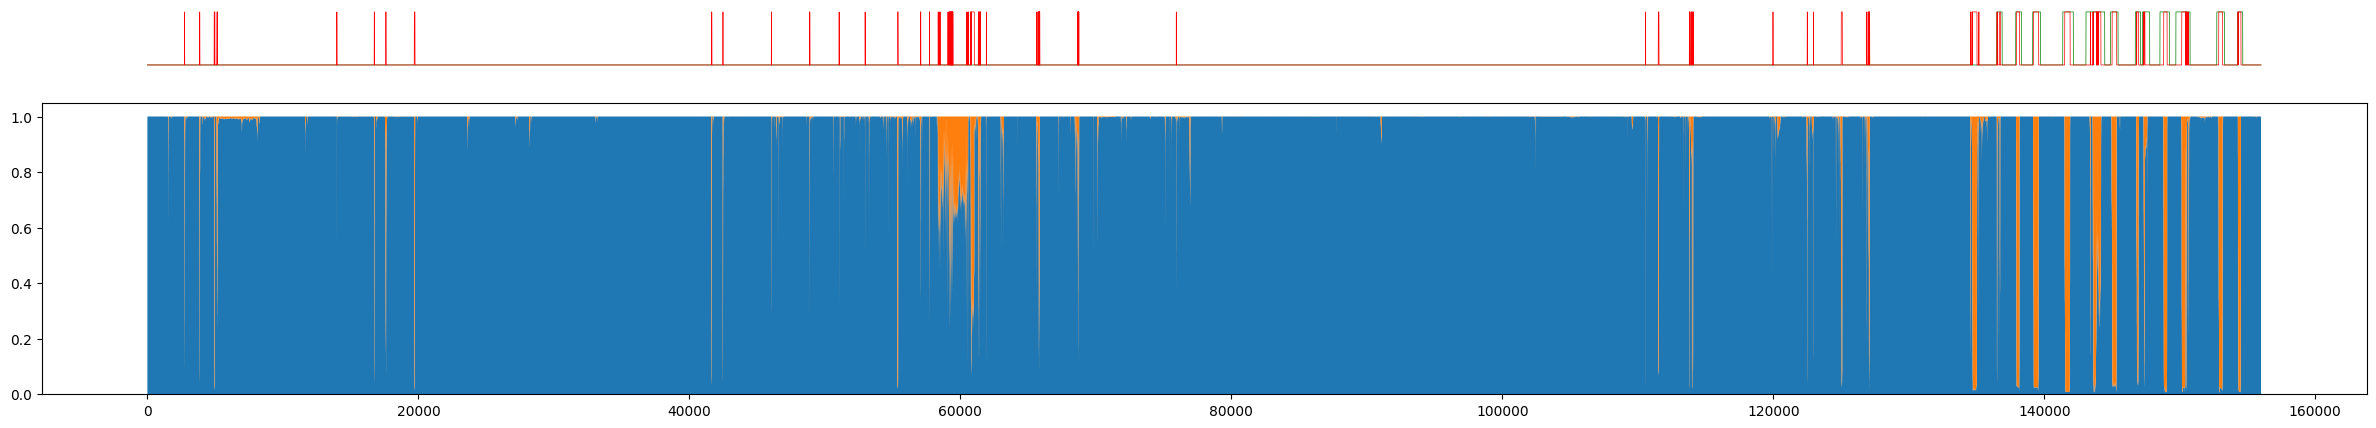

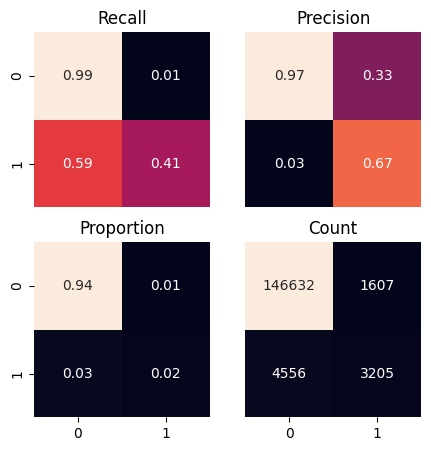

In [2]:
X,y = load_feature_label_pair(index=1)
X = window_epoched_signal(X,windowsize=101)
devloader = DataLoader(TensorDataset(X,y),batch_size=32,shuffle=False)
loss,metric,y_true,y_pred,y_logits = evaluate(devloader,model,criterion)
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(30,5),gridspec_kw={'height_ratios': [1,5]})
axes[0].plot(y_true,'g',linewidth=.5)
axes[0].plot(y_pred,'r',linewidth=.5)
axes[0].axis('off')
plt.stackplot(torch.arange(len(y_logits)),torch.hstack([torch.ones_like(y_logits) - y_logits,y_logits]).T)
plt.savefig(f'logits.pdf',bbox_inches='tight')
cm_grid(y_true,y_pred,save_path=f'cm.jpg')

In [16]:
(y_true[0:2] == torch.Tensor([[0],[1]])).all()

tensor(False)

In [17]:
for i in range(len(y_true)):
    if (y_true[i:i+2] == torch.Tensor([[0],[1]])).all():
        print(i)

136488
137890
139141
141362
143073
144876
146714
147245
148534
149709
152728
154254


In [ ]:
for i in range(1,30):
    if i in [19,24,26,32,34,38,40,45,52,55,70]:
        continue
    X,y = load_feature_label_pair(index=i)
    X = window_epoched_signal(X,windowsize=101)
    devloader = DataLoader(TensorDataset(X,y),batch_size=32,shuffle=False)
    loss,metric,y_true,y_pred,y_logits = evaluate(devloader,model,criterion)
    fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(30,5),gridspec_kw={'height_ratios': [1,5]})
    axes[0].plot(y_true,'g',linewidth=.5)
    axes[0].plot(y_pred,'r',linewidth=.5)
    axes[0].axis('off')
    plt.stackplot(torch.arange(len(y_logits)),torch.hstack([torch.ones_like(y_logits) - y_logits,y_logits]).T)
    plt.savefig(f'{i}.svg',bbox_inches='tight')
    cm_grid(y_true,y_pred,save_path=f'{i}.cm.svg')